![title](Data/image1.jpg)

# Airbnb New User Booking Classification

### • Project Goal
### • Data Cleaning

      Missing values 
      
### • EDA

      Destination

      Booking by Age

      Gender

      Date

      Device Type
      
### • Feature Engineering

      Encoding

      Heatmap

      Pairplot
      
### • Modeling

      PCA

      Random Forest

      Logistic Regression

      Multinomial Naive Bayes

      Gradient Boosting
      
### • Cross Validation

### Project Goal

• Predict which country a new user's first booking destination will be. 

• All the users in this dataset are from the USA.

• There are 12 possible outcomes of the destination country: 
'US', 'FR'- France, 'CA'- Canada, 'GB'- Great Britain, 'ES'- Spain, 'IT'- Italy, 'PT'- Portugal, 'NL'- Netheralands,'DE'- Germany, 'AU'- Austrailia 'NDF' (no destination found), and 'other'. 

    'other' means there was a booking, but is to a country not included in the list

    'NDF' means there wasn't a booking.

## Data Cleaning

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
color = sns.color_palette()


from sklearn.preprocessing import LabelEncoder

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import  GradientBoostingClassifier


In [2]:
# import data
df = pd.read_csv("Data/airbnb_train.csv")
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [3]:
df.describe(include = "all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,213451,213451,sbyrp5enz0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_account_created,213451,1634,2014-05-13,674,NaN,NaN,NaN,NaN,NaN,NaN,NaN
timestamp_first_active,213451,NaN,NaN,NaN,2.01309e+13,9.25372e+09,2.00903e+13,2.01212e+13,2.01309e+13,2.01403e+13,2.01406e+13
date_first_booking,88908,1976,2014-05-22,248,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,213451,4,-unknown-,95688,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,125461,NaN,NaN,NaN,49.6683,155.667,1,28,34,43,2014
signup_method,213451,3,basic,152897,NaN,NaN,NaN,NaN,NaN,NaN,NaN
signup_flow,213451,NaN,NaN,NaN,3.26739,7.63771,0,0,0,0,25
language,213451,25,en,206314,NaN,NaN,NaN,NaN,NaN,NaN,NaN
affiliate_channel,213451,8,direct,137727,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are three features showing missing value, date_first_booking,age and first_affiliate_tracked

### Frist Booking

In [4]:
# date_first_booking
# fill Na with 0
# adding column convert date to code, first_booking date exist =1 and else =0
df['date_first_booking'].fillna(0, inplace=True)
df['first_booking'] = df['date_first_booking'].apply(lambda x: "1" if x != 0 else "0")

df['first_booking'] = df['first_booking'].astype(int)


Percentage of user booked a trip  41.6526509597


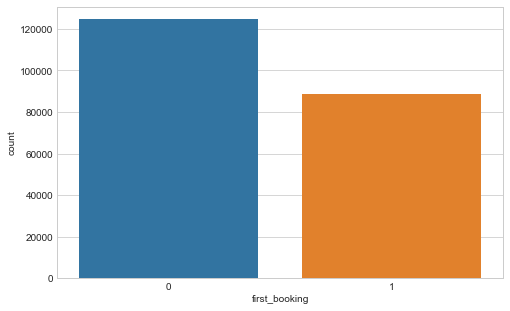

In [5]:
print('Percentage of user booked a trip ',df['first_booking'][df['first_booking'] == 1].count() / df.shape[0] * 100)

fig, axis1 = plt.subplots(1,1,figsize=(8,5))
sns.countplot(x='first_booking', data=df)

### Age

In [6]:
# age
# fillin Na with random generated number within one sd of mean

df["age"][df["age"] > 100] = np.NaN


average_age  = df["age"].mean()
std_age= df["age"].std()
count_nan = df["age"].isnull().sum()

fill_1 = np.random.randint(average_age - std_age, average_age + std_age, size = count_nan)


df["age"][np.isnan(df["age"])] = fill_1
df['age'] = df['age'].astype(int)



C:\Users\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Average Age is  36.11774599322561


Text(0.5,1,'Age')

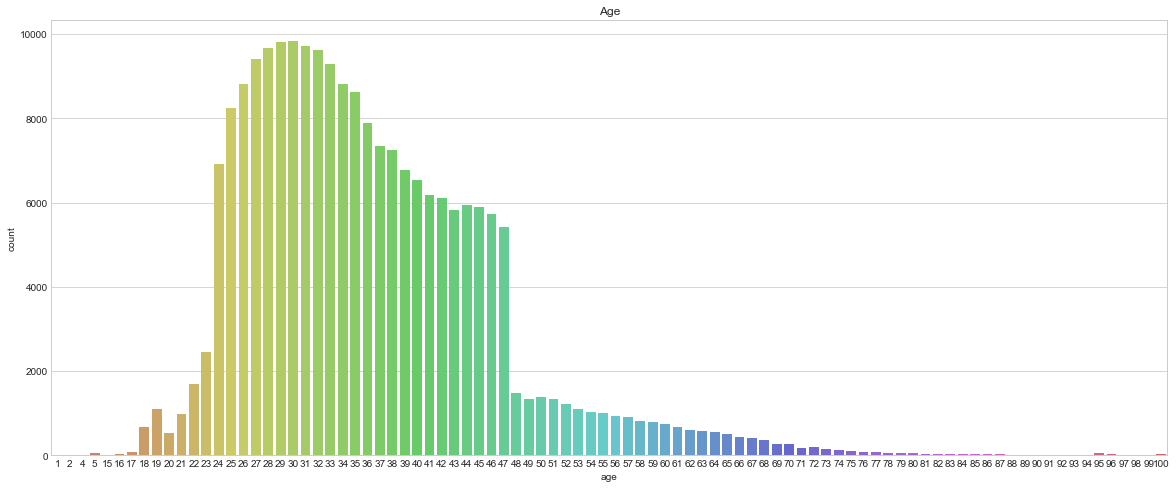

In [7]:
# age distribution
print ('Average Age is ',df["age"].mean())

fig, axis1 = plt.subplots(1,1,figsize=(20,8))
sns.countplot(x='age', data=df, palette="hls", ax=axis1).set_title('Age')


Age distribusiton shows 24- 47 contains most of the user.
Could be due to filling age with mean.

### Affiliate

In [8]:
# first_affiliate_tracked
df["first_affiliate_tracked"].value_counts()


untracked        109232
linked            46287
omg               43982
tracked-other      6156
product            1556
marketing           139
local ops            34
Name: first_affiliate_tracked, dtype: int64

In [9]:
# fill NaN with "untracked" is the most reasonable choice
df['first_affiliate_tracked'].fillna('untracked', inplace=True)


## EDA

### Destination

Text(0.5,1,'Count of Country Destination')

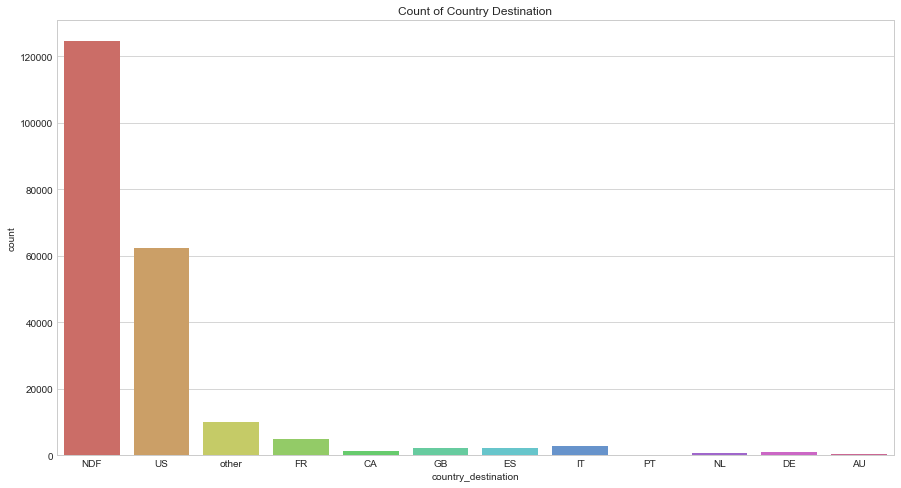

In [10]:
# country_destination
fig, axis1 = plt.subplots(1,1,figsize=(15,8))
sns.countplot(x='country_destination', data=df, palette="hls", ax=axis1).set_title('Count of Country Destination')

Text(0.5,1,'Count of Country Destination')

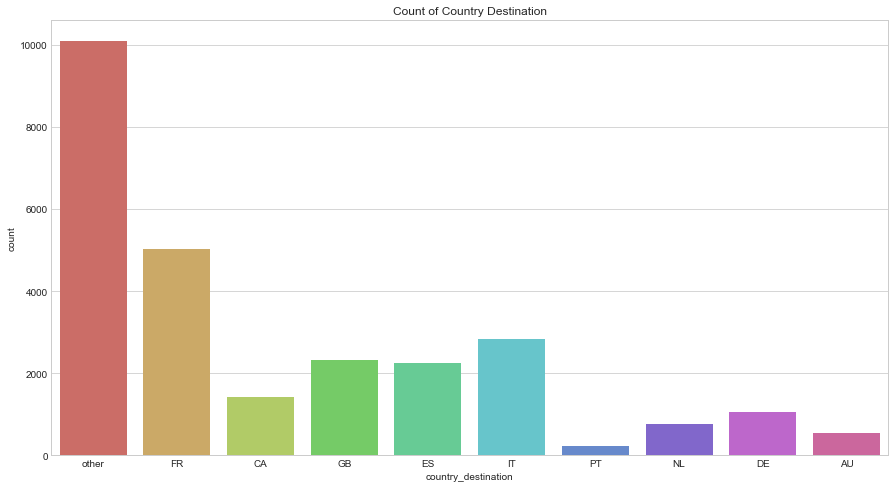

In [11]:
# Country destination w/o NDF, US
fig, axis1 = plt.subplots(1,1,figsize=(15,8))
sns.countplot(x='country_destination', data=df[(df['country_destination'] != 'NDF') & (df['country_destination']!= 'US')], palette="hls", ax=axis1).set_title('Count of Country Destination')


Around 58% user didnot book any trip.
US is the top destination, others are combination of all other choices

### Booking by Age

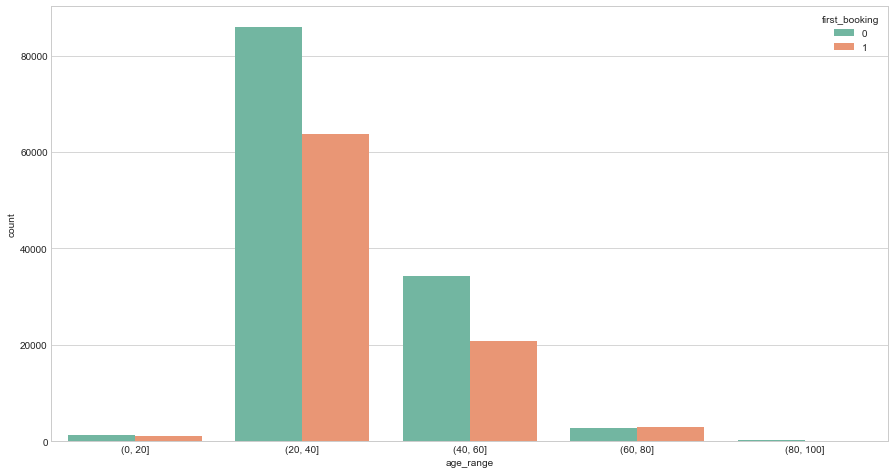

In [12]:
# booking by Age
fig, axis1 = plt.subplots(1,1,figsize=(15,8))
df['age_range'] = pd.cut(df["age"], [0, 20, 40, 60, 80, 100])

sns.countplot(x="age_range",hue="first_booking", data=df, palette="Set2", ax=axis1)

20-40 age group is agian the majority of booked/unbooked trip.

### Gender

Percentage of unknown gender  44.8290239915


Text(0.5,1,'Gender')

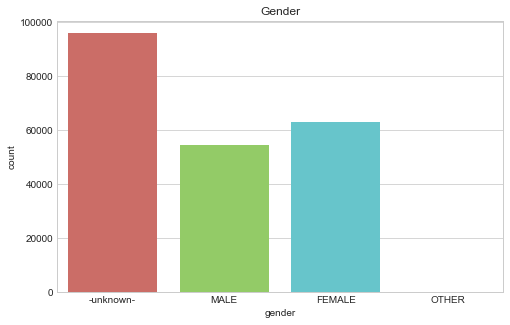

In [13]:
#gender 
print('Percentage of unknown gender ',df['gender'][df['gender'] == '-unknown-'].count() / df.shape[0] * 100)

fig,axis1 = plt.subplots(1,1,figsize=(8,5))
sns.countplot(x='gender', data=df, palette="hls",ax=axis1).set_title('Gender')

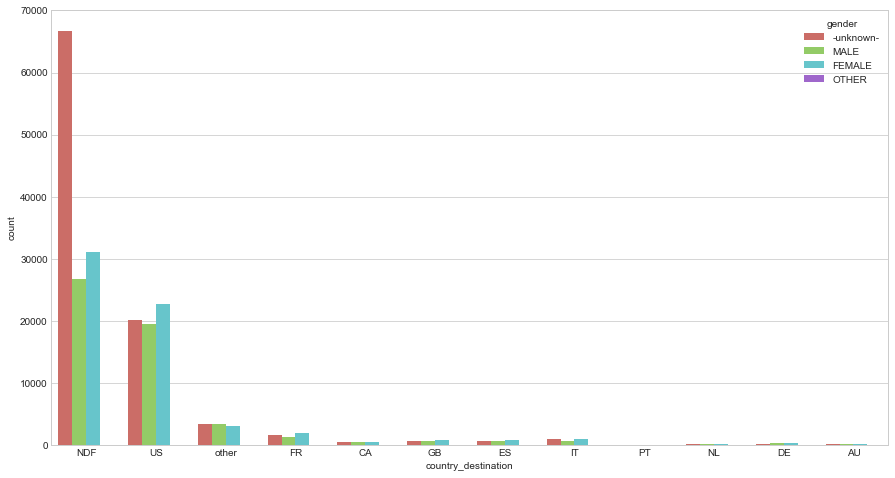

In [14]:
# gender preference
fig, axis1 = plt.subplots(1,1,figsize=(15,8))
sns.countplot(x="country_destination",hue="gender", palette="hls", data=df, ax=axis1)

Limited preference due to high percentage of unknown gender.
High NDF & unknown gender, seems like new user who don't really care and has no plan to book.

### Date

Text(0.5,1,'Account Created')

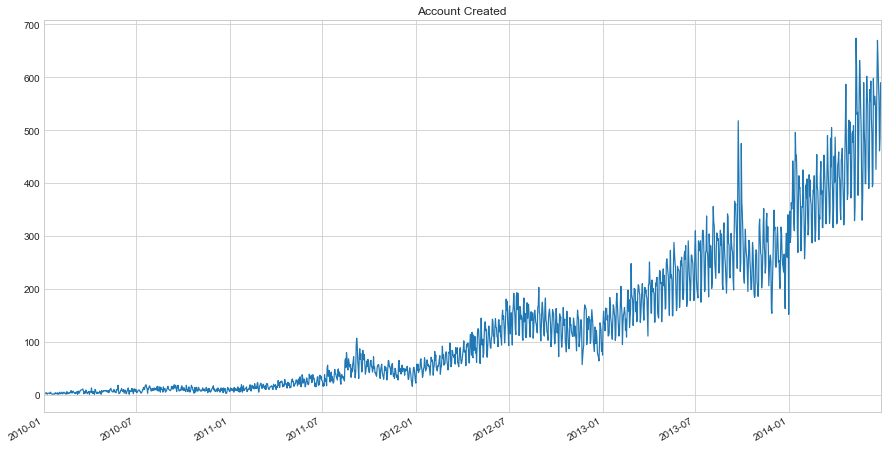

In [15]:
# account created date

fig, axis1 = plt.subplots(1,1,figsize=(15,8))

df['date_account_created_time'] = pd.to_datetime(df['date_account_created'])
df.date_account_created_time.value_counts().plot(kind='line', linewidth=1.2).set_title('Account Created')



Text(0.5,1,'First Booking Date')

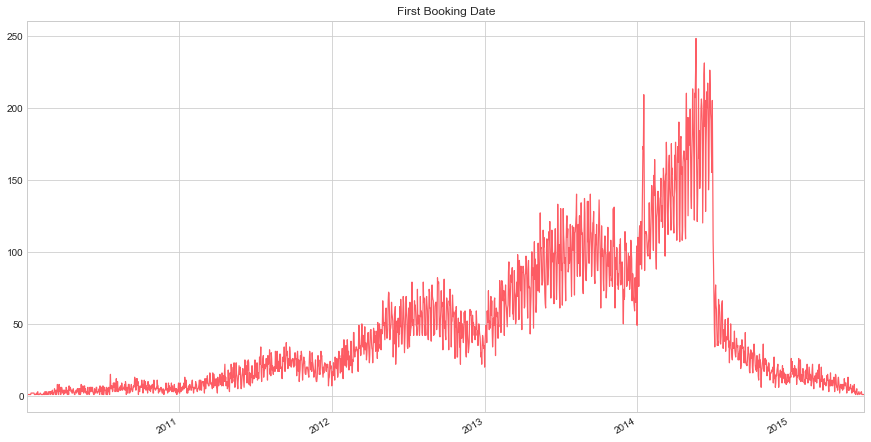

In [16]:
# Date of first booking
df['date_first_booking_time'] = pd.to_datetime(df['date_first_booking'][df['date_first_booking'] != 0])

fig, axis1 = plt.subplots(1,1,figsize=(15,8))
df.date_first_booking_time.value_counts().plot(kind='line', linewidth=1.2, color ='#FD5C64').set_title('First Booking Date')

We can see a gap between account creation date and first booking date.
Also a seasonality trend in booking date, with indicators of major holidays.

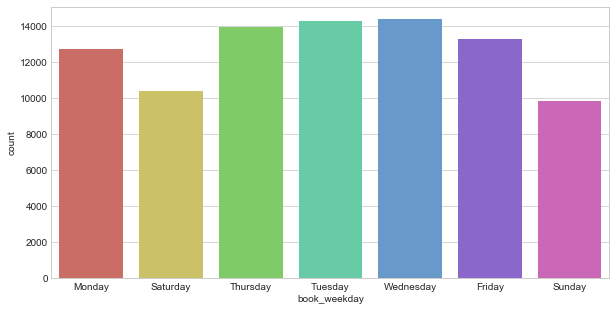

In [17]:
# weekday decision making

fig,axis1 = plt.subplots(1,1,figsize=(10,5))
df['book_weekday']= df.date_first_booking_time.dt.weekday_name
sns.countplot(x="book_weekday",palette="hls", data=df, ax=axis1)

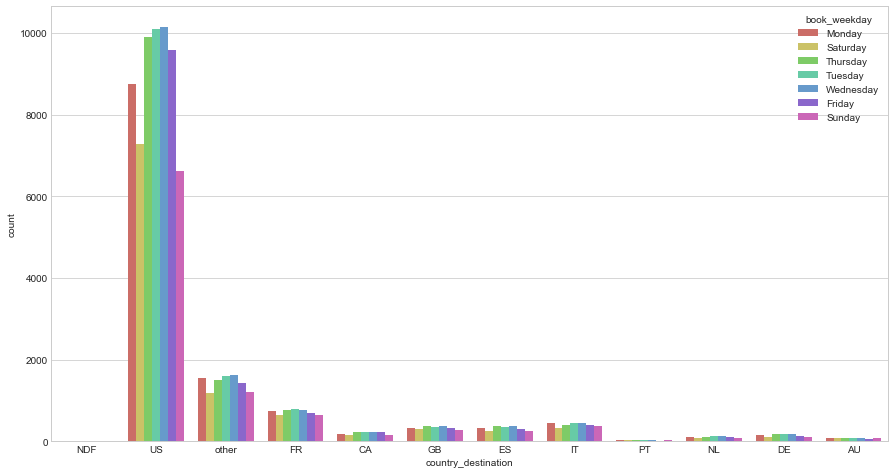

In [18]:
# booking weekday
fig,axis1 = plt.subplots(1,1,figsize=(15,8))
sns.countplot(x="country_destination",hue= 'book_weekday',palette="hls", data=df, ax=axis1)

### Device Type

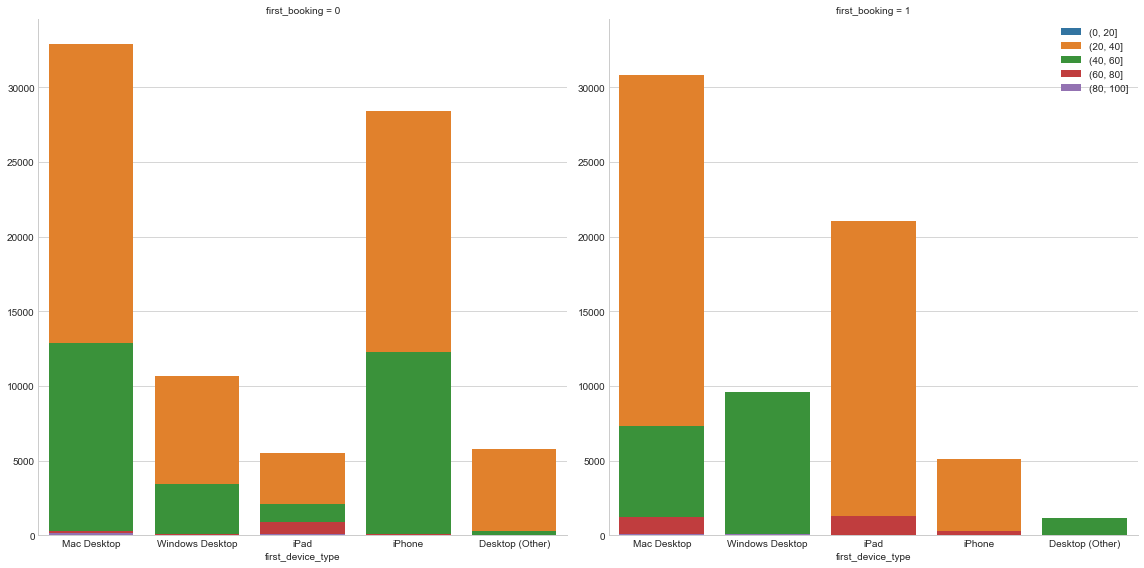

In [19]:
# device type
g = sns.FacetGrid(df, col='first_booking',hue= "age_range", size =8)
g.map(sns.countplot, "first_device_type")
plt.legend()
plt.show()

## Feature Engineering

In [24]:
# weekaday
# fill in NaN weekday with account created weekday
weekday =df.date_account_created_time.dt.weekday_name
df['book_weekday'].fillna(weekday, inplace=True)


In [25]:
# creation year and month
dac = np.vstack(df.date_account_created.astype(str).apply(lambda x: list(map(int, x.split('-')))).values)
df['dac_year'] = dac[:,0]
df['dac_month'] = dac[:,1]


### Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder

# gender
class_le = LabelEncoder()
df['gender']= class_le.fit_transform(df['gender'].values)
df['dac_year']= class_le.fit_transform(df['dac_year'].values)
df['dac_month']= class_le.fit_transform(df['dac_month'].values)
df['country_destination']= class_le.fit_transform(df['country_destination'].values)

In [27]:
#drop not helpful features
df.drop(['id','date_account_created','timestamp_first_active','date_first_booking',
        'age_range','date_account_created_time','date_first_booking_time'], axis=1,inplace=True)

In [28]:
# Encoding catgorical variables has over 5 values
feats1= ["language","affiliate_channel","affiliate_provider","first_affiliate_tracked",
          "first_device_type","first_browser",]
for f in feats1:
    print(df[f].value_counts())

en    206314
zh      1632
fr      1172
es       915
ko       747
de       732
it       514
ru       389
pt       240
ja       225
sv       122
nl        97
tr        64
da        58
pl        54
cs        32
no        30
th        24
el        24
id        22
hu        18
fi        14
is         5
ca         5
hr         2
Name: language, dtype: int64
direct           137727
sem-brand         26045
sem-non-brand     18844
other              8961
seo                8663
api                8167
content            3948
remarketing        1096
Name: affiliate_channel, dtype: int64
direct                 137426
google                  51693
other                   12549
craigslist               3471
bing                     2328
facebook                 2273
vast                      829
padmapper                 768
facebook-open-graph       545
yahoo                     496
gsp                       453
meetup                    347
email-marketing           166
naver                     

In [29]:
# language en=1 , others=0
df['language'] = df['language'].apply(lambda x: "1" if x=="en" else "0").astype(int)

# affiliate_channel direct =1 , others =0
df['affiliate_channel'] = df['affiliate_channel'].apply(lambda x: "1" if x == "direct" else "0").astype(int)

# affiliate_provider direct =2 , google =1 , others =0 
df['affiliate_provider'] = df['affiliate_provider'].apply(lambda x: "2" if x == "direct" else("1" if x == "google" else "0")).astype(int)       

# first_affiliate_tracked untracke=0,  linked=3,  omg=2,others =1       
df['first_affiliate_tracked'] = df['first_affiliate_tracked'].apply(lambda x: "3" if x == "linked" else("2" if x == "omg" else ("0" if x == "untracked" else "1"))).astype(int)

# first_device_type mac=3, win=2, iphone&ipad =1, others =0
df['first_device_type'] = df['first_device_type'].apply(lambda x: "3" if x == "Mac Desktop" else("2" if x == "Windows Desktop" else ("1" if x == "iPhone" or "iPad" else "0"))).astype(int)   

#first_browser  Chrome=3, Safari=2, Firefox=1 , others =0
df['first_browser'] = df['first_browser'].apply(lambda x: "3" if x == "Chrome" else("2" if x == "Safari" else ("1" if x == "Firefox" else "0"))).astype(int)   

In [30]:
# one hot encoding 

feats2 = ['signup_method','signup_app','book_weekday']

for f in feats2:
    df_dummy = pd.get_dummies(df[f], prefix=f,drop_first=True)
    df = df.drop([f], axis=1)
    df = pd.concat((df, df_dummy), axis=1)

In [31]:
df = df.set_index('country_destination').reset_index()

In [32]:
df.head().transpose()

,0,1,2,3,4
country_destination,7,7,10,11,10
gender,0,2,1,1,0
age,33,38,56,42,41
signup_flow,0,0,3,0,0
language,1,1,1,1,1
affiliate_channel,1,0,1,1,1
affiliate_provider,2,1,2,2,2
first_affiliate_tracked,0,0,0,0,0
first_device_type,3,3,2,3,3
first_browser,3,3,0,1,3


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 24 columns):
country_destination        213451 non-null int64
gender                     213451 non-null int64
age                        213451 non-null int32
signup_flow                213451 non-null int64
language                   213451 non-null int32
affiliate_channel          213451 non-null int32
affiliate_provider         213451 non-null int32
first_affiliate_tracked    213451 non-null int32
first_device_type          213451 non-null int32
first_browser              213451 non-null int32
first_booking              213451 non-null int32
dac_year                   213451 non-null int64
dac_month                  213451 non-null int64
signup_method_facebook     213451 non-null uint8
signup_method_google       213451 non-null uint8
signup_app_Moweb           213451 non-null uint8
signup_app_Web             213451 non-null uint8
signup_app_iOS             213451 non-null uint8
book_we

In [34]:
df.describe()

,country_destination,gender,age,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,first_device_type,first_browser,...,signup_method_google,signup_app_Moweb,signup_app_Web,signup_app_iOS,book_weekday_Monday,book_weekday_Saturday,book_weekday_Sunday,book_weekday_Thursday,book_weekday_Tuesday,book_weekday_Wednesday
count,213451.000000,213451.000000,213451.000000,213451.000000,213451.000000,213451.000000,213451.000000,213451.000000,213451.000000,213451.000000,...,213451.000000,213451.000000,213451.000000,213451.000000,213451.000000,213451.000000,213451.000000,213451.000000,213451.000000,213451.000000
mean,7.840971,0.809399,36.095155,3.267387,0.966564,0.645239,1.529836,1.099597,2.180205,1.478222,...,0.002558,0.029332,0.856014,0.089102,0.149210,0.116181,0.113342,0.154157,0.162965,0.159995
std,1.900826,0.819937,9.979334,7.637707,0.179773,0.478442,0.690723,1.266373,0.791745,1.229213,...,0.050512,0.168737,0.351077,0.284892,0.356296,0.320443,0.317011,0.361100,0.369334,0.366602
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,29.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,1.000000,34.000000,0.000000,1.000000,1.000000,2.000000,0.000000,2.000000,2.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.000000,2.000000,42.000000,0.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11.000000,3.000000,100.000000,25.000000,1.000000,1.000000,2.000000,3.000000,3.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


23 features after encoding

### Heatmap

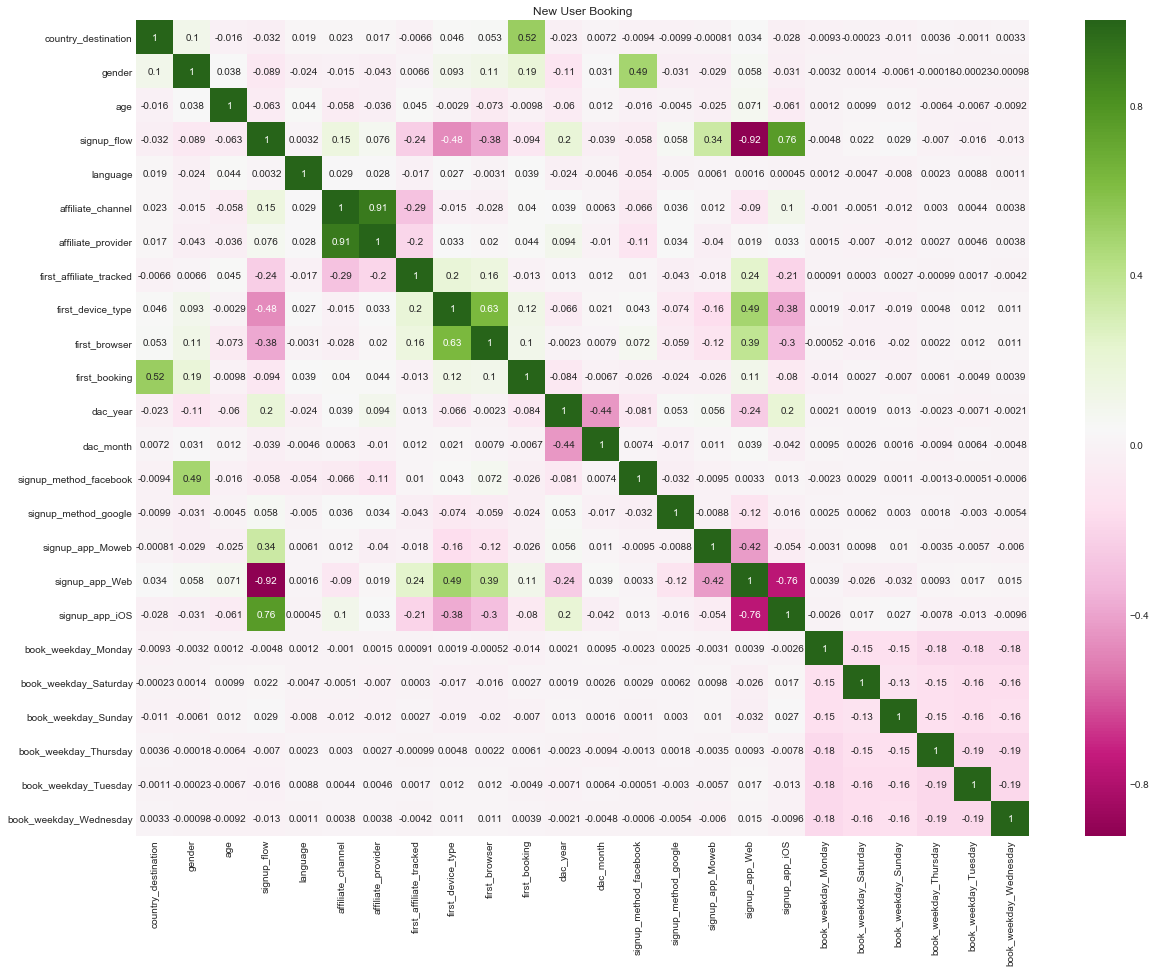

In [30]:
# correlation heatmap
fig, axis1 = plt.subplots(1,1,figsize=(20,15))
plt.title('New User Booking')
correlation = df.corr()
sns.heatmap(correlation, xticklabels = correlation.columns.values, 
            yticklabels = correlation.columns.values , 
            annot=True, cmap="PiYG")

### Pairplot

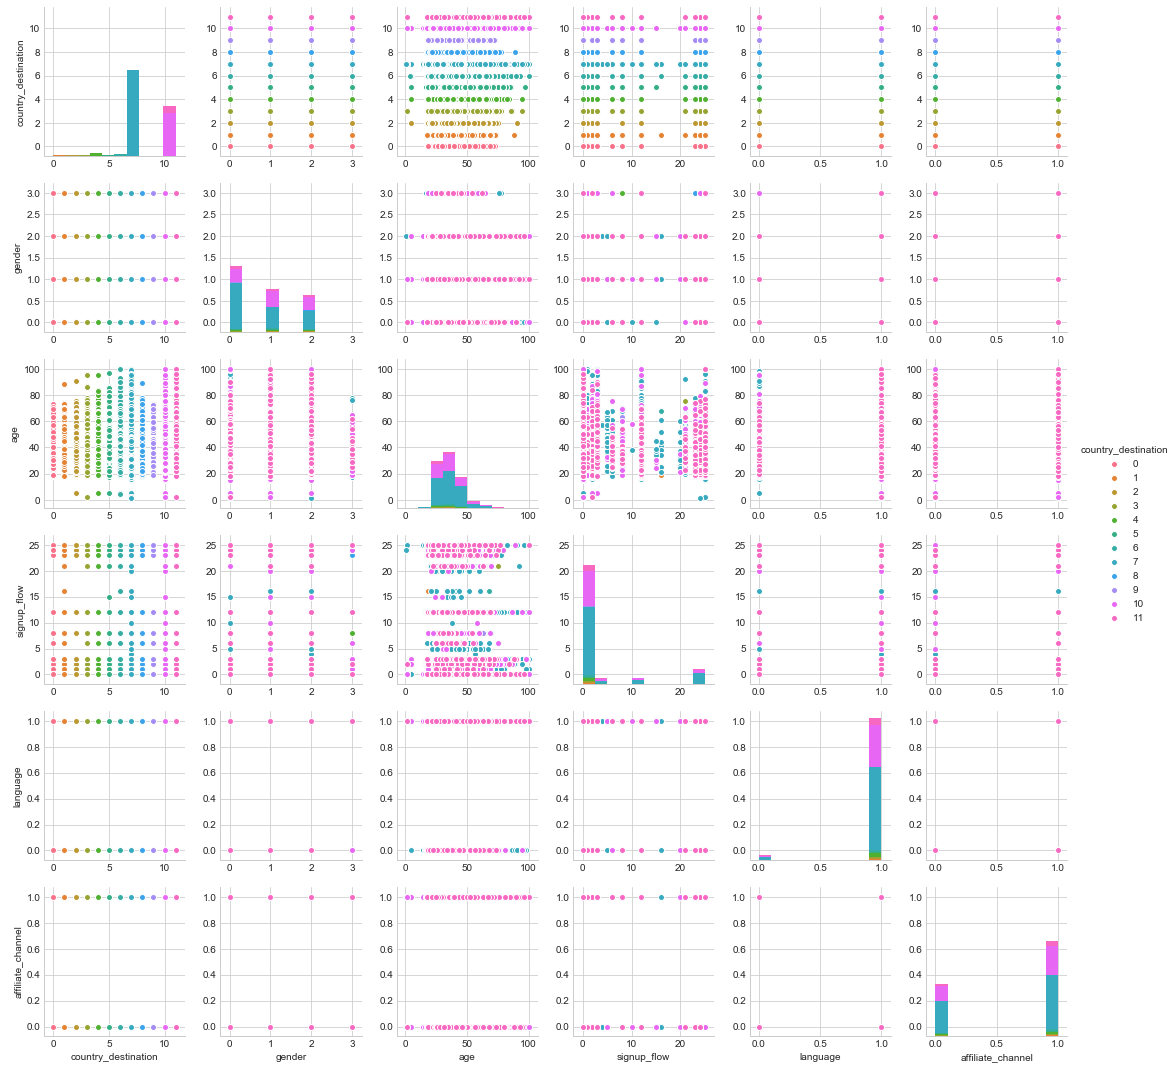

In [31]:
# pairplot
subdf1= df.iloc[:, 0:6]
sns.pairplot(subdf1,hue="country_destination")

## Modeling

In [32]:
# split the dataset 
from sklearn.model_selection import train_test_split
X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [33]:
y_train

array([ 7,  7,  7, ..., 10,  7, 10], dtype=int64)

### PCA

Populating the interactive namespace from numpy and matplotlib


C:\Users\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


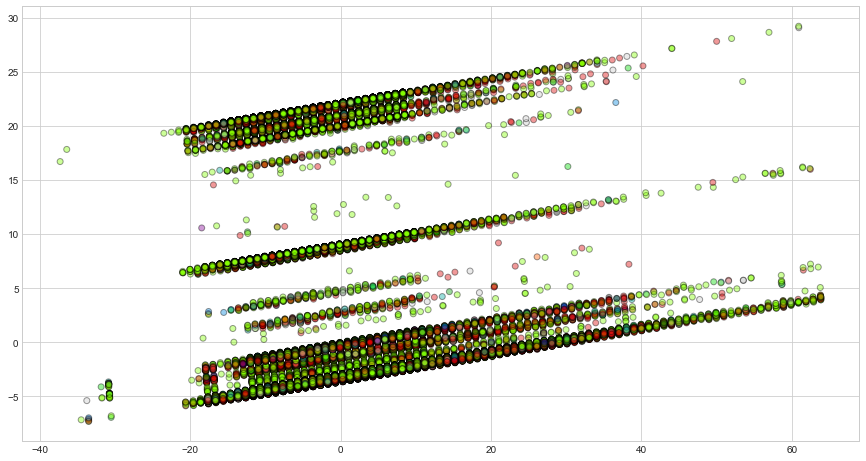

In [34]:
%pylab inline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

#scatter(X_pca[:, 0], X_pca[:, 1], c)
fig, axis1 = plt.subplots(1,1,figsize=(15,8))
X_pca = PCA().fit_transform(df)
scatter(X_pca[:, 0], X_pca[:, 1], c=y,cmap=plt.cm.spectral,alpha=.4, edgecolor='k')
plt.show()

### Random Forest

In [35]:
# random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)
rf.score(X_test,y_test)

0.85768942469860698

[  3.06087451e-02   1.33566709e-01   9.68407704e-03   3.29956456e-03
   3.34356234e-03   5.94337200e-03   1.89084567e-02   1.34207192e-02
   2.41003509e-02   6.03625184e-01   2.28682569e-02   7.36946382e-02
   1.19038795e-02   6.89849820e-05   5.85933075e-04   2.03910134e-03
   1.50646367e-03   6.62235154e-03   6.28939742e-03   5.56163480e-03
   7.28777195e-03   7.44004570e-03   7.63080014e-03]
['gender', 'age', 'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'first_device_type', 'first_browser', 'first_booking', 'dac_year', 'dac_month', 'signup_method_facebook', 'signup_method_google', 'signup_app_Moweb', 'signup_app_Web', 'signup_app_iOS', 'book_weekday_Monday', 'book_weekday_Saturday', 'book_weekday_Sunday', 'book_weekday_Thursday', 'book_weekday_Tuesday', 'book_weekday_Wednesday']


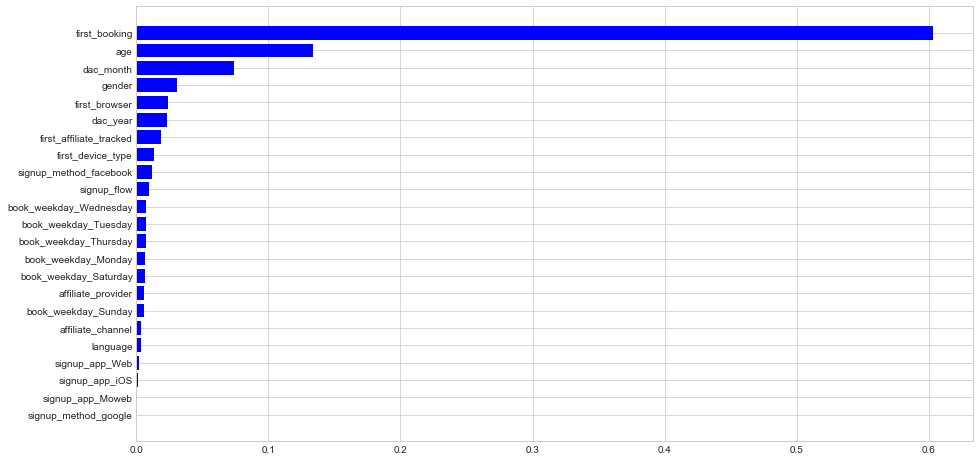

In [36]:
#feature importance
importance = rf.feature_importances_
features = ['gender', 'age', 'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'first_device_type', 'first_browser', 'first_booking', 'dac_year', 'dac_month', 'signup_method_facebook', 'signup_method_google', 'signup_app_Moweb', 'signup_app_Web', 'signup_app_iOS', 'book_weekday_Monday', 'book_weekday_Saturday', 'book_weekday_Sunday', 'book_weekday_Thursday', 'book_weekday_Tuesday', 'book_weekday_Wednesday']
print(importance)
print(features)
order = np.argsort(importance)
rank = order.argsort()
fig, axis1 = plt.subplots(1,1,figsize=(15,8))
plt.barh(rank,importance,color='b')
plt.yticks(rank,features)
plt.show()

### Logistic Regression

In [37]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test,y_test)

0.87569492160659634

### Multinomial Naive Bayes

In [38]:
# Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

mnb = MultinomialNB(alpha=1.0,class_prior=None, fit_prior=True)
mnb.fit(X_train, y_train)
mnb.score(X_test,y_test)

0.76694359422824665

### Gradient Boosting

In [39]:
# Gradient Boosting
from sklearn.ensemble import  GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, random_state=1)
gb.fit(X_train,y_train)
gb.score(X_test,y_test)

0.87563245674308199

## Cross Validation


In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

labels = ['Random Forest', 'Logistic Regression', 'Multinomial Naive Bayes', 'Gradient Boosting']
print('10-fold cross validation:\n')
for clf, label in zip([rf, logreg, mnb,gb], labels):
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5)
    print("Mean Score:" , scores.mean(), label)

10-fold cross validation:

Mean Score: 0.859726257801 Random Forest
Mean Score: 0.875701915638 Logistic Regression
Mean Score: 0.765084212349 Multinomial Naive Bayes
Mean Score: 0.875581448491 Gradient Boosting


In [ ]:
Model selected based on accuracy: Logistic Regression

### Next Step :Combining Different Models for Ensemble Learning

In [41]:
# next step

##### Reference
https://www.kaggle.com/omarelgabry/airbnb-user-bookings

https://www.kaggle.com/nikhiljangam/exploratory-data-analysis